In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
entry = 6
nevents = 1000000
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run021142.root'
output_path = 'kinfit_gaussian_fit_etapipi_etato2gamma_run021142_.root'

In [3]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/gaussian_sim/etapipi/vertex_and_xy_momentum_constraints_vtxsigma/TrPh_C.so


In [6]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

140200730652712

(TFile &) Name: /var/kinfit/data/tr_ph_run021142.root Title: 


In [7]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

140198939779072

(TrPh &) @0x7f829c00e000


In [8]:
ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

0

In [9]:
ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

0

In [10]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

In [11]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [12]:
fl = TFile.Open(output_path, 'read')

In [13]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return 0.1875 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [14]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 24, 2)')

140200730653584

(TF1 &) Name: f0 Title: f0


In [15]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+3)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 4)')

0

In [16]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94664733786624

 FCN=131.828 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=1.15085e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99832e+05   1.00001e+03   5.54548e+00  -3.44251e-07
   2  p1           4.99838e+00   2.85410e-03   1.60619e-05   1.17182e-01
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


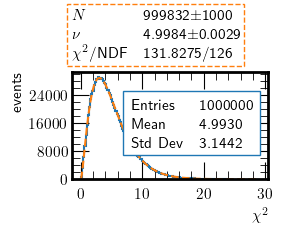

In [17]:
draw_chi2_gaussian_sim("kf_chi2", "f0", xlabel=r'$\chi^2$',
                       ylabel='events',
                      fraction=0.47,
                       info_coords=(0.3, 0.3),
                       dh=0.8, dw=-0.3,
                      h_y=8000, h_x=10)
plt.savefig('kf_chi2_gsim_etapipi_vertex_and_xy_momentum_constraints.eps', bbox_inches='tight')

In [18]:
# fl.Close()